In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from pingouin import kruskal
from pybedtools import BedTool

In [2]:
RootChomatin_bp_covered = '../../data/promoter_analysis/responsivepromotersRootOpenChrom.bp_covered.txt'
ShootChomatin_bp_covered = '../../data/promoter_analysis/responsivepromotersShootOpenChrom.bp_covered.txt'
RootShootIntersect_bp_covered = '../../data/promoter_analysis/responsivepromotersShootRootIntersectOpenChrom.bp_covered.txt'

In [3]:
def add_chr_linestart(input_location,output_location):
    """this function adds chr to the beginning of the line if it starts with a digit and saves a file"""
    output = open(output_location, 'w') #make output file with write capability
    #open input file
    with open(input_location, 'r') as infile:  
        #iterate over lines in file
        for line in infile:
            line = line.strip() # removes hidden characters/spaces
            if line[0].isdigit():
                                 
                line = 'chr' + line   #prepend chr to the beginning of line if starts with a digit
            output.write(line + '\n') #output to new file
    output.close()

In [4]:
def percent_coverage(bp_covered):
    """function to calculate the % coverage from the output file of bedtools coverage"""

    coverage_df = pd.read_table(bp_covered, sep='\t', header=None)
    col = ['chr','start','stop','gene','dot','strand','source', 'type', 'dot2', 'details', 'no._of_overlaps', 'no._of_bases_covered','promoter_length','fraction_bases_covered']
    coverage_df.columns = col
    #add % bases covered column
    coverage_df['percentage_bases_covered'] = coverage_df.fraction_bases_covered * 100

    #remove unnecessary columns
    coverage_df_reduced_columns = coverage_df[['chr','start','stop','gene','strand', 'no._of_overlaps', 'no._of_bases_covered','promoter_length','fraction_bases_covered','percentage_bases_covered']]
    return coverage_df_reduced_columns

In [5]:
root_coverage = percent_coverage(RootChomatin_bp_covered)

In [6]:
shoot_coverage = percent_coverage(ShootChomatin_bp_covered)

In [7]:
rootshootintersect_coverage = percent_coverage(RootShootIntersect_bp_covered)

In [8]:
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [14]:
#distribution plot

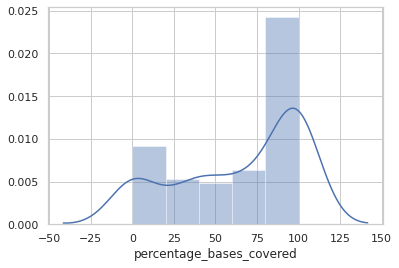

In [90]:
dist_plot = root_coverage['percentage_bases_covered']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

#save to file
#dist_plot_fig.savefig('../../data/plots/TFBS_coverage/all_genes_bp_covered_dist.pdf', format='pdf')


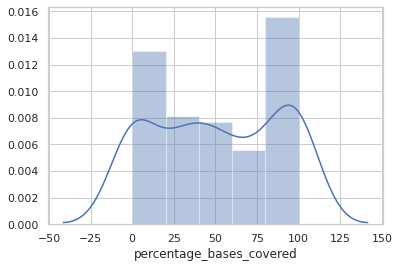

In [91]:
dist_plot = shoot_coverage['percentage_bases_covered']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

#save to file
#dist_plot_fig.savefig('../../data/plots/TFBS_coverage/all_genes_bp_covered_dist.pdf', format='pdf')


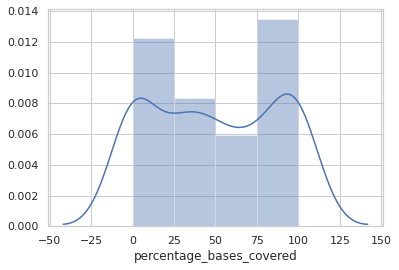

In [93]:
dist_plot = rootshootintersect_coverage['percentage_bases_covered']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

#save to file
#dist_plot_fig.savefig('../../data/plots/TFBS_coverage/all_genes_bp_covered_dist.pdf', format='pdf')


## constitutive vs variable

In [94]:
def add_genetype(coverage):
    """function to add gene type to the df, and remove random genes"""
    select_genes_file = '../../data/genomes/ara_housekeeping_list.out'
    select_genes = pd.read_table(select_genes_file, sep='\t', header=None)
    cols = ['gene','gene_type']
    select_genes.columns = cols
    merged = pd.merge(coverage, select_genes, on='gene')
    
    merged_renamed = merged.copy()
    merged_renamed.gene_type.replace('housekeeping','constitutive', inplace=True)
    merged_renamed.gene_type.replace('highVar','variable', inplace=True)
    merged_renamed.gene_type.replace('randCont','random', inplace=True)
   
   # no_random = merged_renamed[merged_renamed.gene_type != 'random']
  #  no_random.reset_index(drop=True, inplace=True)
    
    return merged_renamed

In [95]:
roots_merged = add_genetype(root_coverage)
no_random_roots = roots_merged[roots_merged.gene_type != 'random']

In [96]:
shoots_merged = add_genetype(shoot_coverage)
no_random_shoots = shoots_merged[shoots_merged.gene_type != 'random']

In [97]:
rootsshootsintersect_merged = add_genetype(rootshootintersect_coverage)
no_random_rootsshoots = rootsshootsintersect_merged[rootsshootsintersect_merged.gene_type != 'random']

In [98]:
#how many have open chromatin??
print('root openchromatin present:')
print(len(no_random_roots)-len(no_random_roots[no_random_roots.percentage_bases_covered == 0]))
print('shoot openchromatin present:')
print(len(no_random_shoots)-len(no_random_shoots[no_random_shoots.percentage_bases_covered == 0]))
print('root-shoot intersect openchromatin present:')
print(len(no_random_rootsshoots)-len(no_random_rootsshoots[no_random_rootsshoots.percentage_bases_covered == 0]))

root openchromatin present:
164
shoot openchromatin present:
153
root-shoot intersect openchromatin present:
149


In [99]:
#how many have open chromatin??
print('root openchromatin present variable promoters:')
print(len(no_random_roots[no_random_roots.gene_type=='variable'])-len(no_random_roots[no_random_roots.gene_type=='variable'][no_random_roots[no_random_roots.gene_type=='variable'].percentage_bases_covered == 0]))
print('root openchromatin present constitutive promoters:')
print(len(no_random_roots[no_random_roots.gene_type=='constitutive'])-len(no_random_roots[no_random_roots.gene_type=='constitutive'][no_random_roots[no_random_roots.gene_type=='constitutive'].percentage_bases_covered == 0]))


print('shoot openchromatin present variable promoters:')
print(len(no_random_shoots[no_random_shoots.gene_type=='variable'])-len(no_random_shoots[no_random_shoots.gene_type=='variable'][no_random_shoots[no_random_shoots.gene_type=='variable'].percentage_bases_covered == 0]))
print('shoot openchromatin present constitutive promoters:')
print(len(no_random_shoots[no_random_shoots.gene_type=='constitutive'])-len(no_random_shoots[no_random_shoots.gene_type=='constitutive'][no_random_shoots[no_random_shoots.gene_type=='constitutive'].percentage_bases_covered == 0]))

print('root-shoot intersect openchromatin present variable promoters:')
print(len(no_random_rootsshoots[no_random_rootsshoots.gene_type=='variable'])-len(no_random_rootsshoots[no_random_rootsshoots.gene_type=='variable'][no_random_rootsshoots[no_random_rootsshoots.gene_type=='variable'].percentage_bases_covered == 0]))
print('root-shoot intersect openchromatin present constitutive promoters:')
print(len(no_random_rootsshoots[no_random_rootsshoots.gene_type=='constitutive'])-len(no_random_rootsshoots[no_random_rootsshoots.gene_type=='constitutive'][no_random_rootsshoots[no_random_rootsshoots.gene_type=='constitutive'].percentage_bases_covered == 0]))

root openchromatin present variable promoters:
75
root openchromatin present constitutive promoters:
89
shoot openchromatin present variable promoters:
66
shoot openchromatin present constitutive promoters:
87
root-shoot intersect openchromatin present variable promoters:
63
root-shoot intersect openchromatin present constitutive promoters:
86


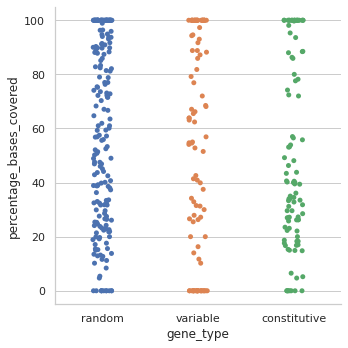

In [37]:
sns.catplot(x="gene_type", y="percentage_bases_covered", data=roots_merged) #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered.pdf', format='pdf')

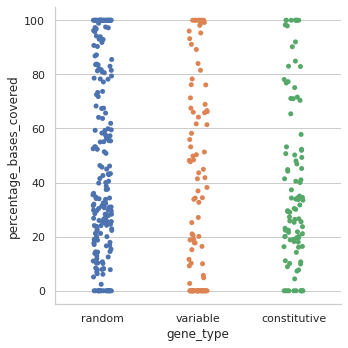

In [36]:
sns.catplot(x="gene_type", y="percentage_bases_covered", data=shoots_merged) #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered.pdf', format='pdf')

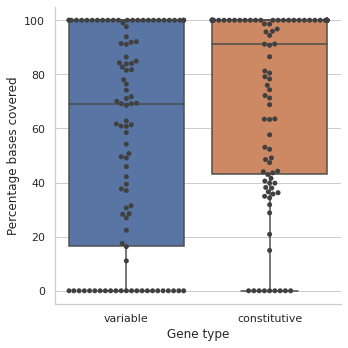

In [100]:
#roots
plot = sns.catplot(x="gene_type", y="percentage_bases_covered", kind='box', data=no_random_roots)
#plot points
ax = sns.swarmplot(x="gene_type", y="percentage_bases_covered", data=no_random_roots, color=".25")
plt.ylabel('Percentage bases covered')
plt.xlabel('Gene type');
#ax.get_figure() #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered_boxplot.pdf', format='pdf')

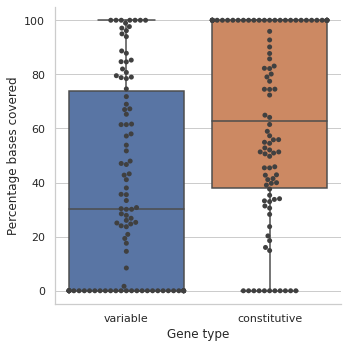

In [101]:
#shoots
plot = sns.catplot(x="gene_type", y="percentage_bases_covered", kind='box', data=no_random_shoots)
#plot points
ax = sns.swarmplot(x="gene_type", y="percentage_bases_covered", data=no_random_shoots, color=".25")
plt.ylabel('Percentage bases covered')
plt.xlabel('Gene type');
#ax.get_figure() #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered_boxplot.pdf', format='pdf')

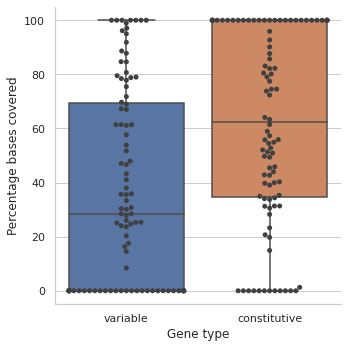

In [102]:
#roots-shoots intersect
plot = sns.catplot(x="gene_type", y="percentage_bases_covered", kind='box', data=no_random_rootsshoots)
#plot points
ax = sns.swarmplot(x="gene_type", y="percentage_bases_covered", data=no_random_rootsshoots, color=".25")
plt.ylabel('Percentage bases covered')
plt.xlabel('Gene type');
#ax.get_figure() #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered_boxplot.pdf', format='pdf')

In [103]:
#Get names of each promoter
def normality(input_proms):
    """function to test normality of data - returns test statistic, p-value"""
    #Get names of each promoter
    pd.Categorical(input_proms.gene_type)
    names = input_proms.gene_type.unique()
#     for name in names:
#         print(name)
       
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(input_proms.percentage_bases_covered[input_proms.gene_type == name])))
    

In [104]:
def variance(input_proms):
    """function to test variance of data"""
#test variance
    constitutive = input_proms[input_proms.gene_type == 'constitutive']
    #reset indexes so residuals can be calculated later
    constitutive.reset_index(inplace=True)

    responsive = input_proms[input_proms.gene_type == 'variable']
    responsive.reset_index(inplace=True)

    control = input_proms[input_proms.gene_type == 'random']
    control.reset_index(inplace=True)

    print(stats.levene(constitutive.percentage_bases_covered, responsive.percentage_bases_covered))

In [105]:
normality(no_random_roots)

variable: (0.8330899477005005, 3.833479311765586e-09)
constitutive: (0.7916173934936523, 1.8358696507458916e-10)


In [106]:
normality(no_random_shoots)

variable: (0.8625870943069458, 4.528254393676434e-08)
constitutive: (0.8724747896194458, 1.1140339495341323e-07)


In [107]:
normality(no_random_rootsshoots)

variable: (0.8546600937843323, 2.263117515610702e-08)
constitutive: (0.8711197376251221, 9.823354929494599e-08)


## Not normal

In [108]:
variance(no_random_roots)

LeveneResult(statistic=3.3550855113629137, pvalue=0.0685312309497174)


In [109]:
variance(no_random_shoots)

LeveneResult(statistic=0.20460439034148425, pvalue=0.6515350841099911)


In [110]:
variance(no_random_rootsshoots)

LeveneResult(statistic=0.00041366731166758155, pvalue=0.9837939970964911)


## unequal variance for shoots

In [111]:
def kruskal_test(input_data):
    """function to do kruskal-wallis test on data""" 
   
    #print('\033[1m' +promoter + '\033[0m')
    print(kruskal(data=input_data, dv='percentage_bases_covered', between='gene_type'))
  #print('')

In [112]:
no_random_roots

,chr,start,stop,gene,strand,no._of_overlaps,no._of_bases_covered,promoter_length,fraction_bases_covered,percentage_bases_covered,gene_type
0,1,282891,282918,AT1G01780,+,0,0,27,0.000000,0.00000,variable
1,1,315831,315982,AT1G01910,-,1,151,151,1.000000,100.00000,constitutive
2,1,344515,346051,AT1G02000,+,1,1521,1536,0.990234,99.02344,variable
3,1,728829,730147,AT1G03070,+,2,653,1318,0.495448,49.54476,variable
4,1,864019,865372,AT1G03457,-,1,1353,1353,1.000000,100.00000,variable
...,...,...,...,...,...,...,...,...,...,...,...
191,5,22956628,22957985,AT5G56750,+,1,1357,1357,1.000000,100.00000,variable
192,5,24326665,24327827,AT5G60490,-,0,0,1162,0.000000,0.00000,variable
193,5,24670749,24671050,AT5G61360,+,1,246,301,0.817276,81.72758,variable
194,5,25909881,25910835,AT5G64813,+,1,606,954,0.635220,63.52201,constitutive


In [113]:
kruskal_test(no_random_roots)

            Source  ddof1         H     p-unc
Kruskal  gene_type      1  7.281793  0.006966


In [114]:
kruskal_test(no_random_shoots)

            Source  ddof1          H     p-unc
Kruskal  gene_type      1  20.935596  0.000005


In [115]:
kruskal_test(no_random_rootsshoots)

            Source  ddof1          H     p-unc
Kruskal  gene_type      1  22.450983  0.000002


## try gat enrichment

In [33]:
#add Chr to linestart of chromatin bed files

add_chr_linestart('../../data/ATAC-seq/potter2018/Shoots_NaOH_peaks_all.bed','../../data/ATAC-seq/potter2018/Shoots_NaOH_peaks_all_renamed.bed')
add_chr_linestart('../../data/ATAC-seq/potter2018/Roots_NaOH_peaks_all.bed','../../data/ATAC-seq/potter2018/Roots_NaOH_peaks_all_renamed.bed')
add_chr_linestart('../../data/ATAC-seq/potter2018/intersectRootsShoots_PeaksInBoth.bed','../../data/ATAC-seq/potter2018/intersectRootsShoots_PeaksInBoth_renamed.bed')

In [18]:
#create a bed file containing all 100 constitutive/responsive promoters with the fourth column annotating whether it's constitutive or responsive
proms_file = '../../data/genes/constitutive-variable-random_100_each.csv'
promoters = pd.read_csv(proms_file)
promoters
cols2 = ['delete','promoter_AGI', 'gene_type']
promoters_df = promoters[['promoter_AGI','gene_type']]
promoters_no_random = promoters_df.copy()
#drop randCont rows
promoters_no_random = promoters_df[~(promoters_df.gene_type == 'randCont')]
promoters_no_random

,promoter_AGI,gene_type
0,AT4G34270,housekeeping
1,AT3G32260,housekeeping
2,AT1G59830,housekeeping
3,AT4G33380,housekeeping
4,AT2G28390,housekeeping
...,...,...
195,AT3G44070,highVar
196,AT5G61360,highVar
197,AT5G16100,highVar
198,AT3G60570,highVar


In [19]:
#merge promoters with genetype selected
promoterbedfile = '../../data/FIMO/responsivepromoters.bed'
promoters_bed = pd.read_table(promoterbedfile, sep='\t', header=None)
cols = ['chr', 'start', 'stop', 'promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']
promoters_bed.columns = cols
merged = pd.merge(promoters_bed,promoters_no_random, on='promoter_AGI')

In [20]:
#add gene_type to column3
merged = merged[['chr','start','stop','gene_type','promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']]

In [66]:
#write to bed file
promoter_file = '../../data/promoter_analysis/old1000bpproms_variable_constitutive_workspace.bed'
with open(promoter_file,'w') as f:
    merged.to_csv(f,index=False,sep='\t',header=None)

In [51]:
# new_merged = merged.astype({'start': 'int'})
# new_merged = merged.astype({'stop': 'int'})
# new_merged = merged.astype({'chr': 'int'})

In [67]:
#add Chr to linestart of promoter bed file

add_chr_linestart('../../data/promoter_analysis/old1000bpproms_variable_constitutive_workspace.bed','../../data/promoter_analysis/old1000bpproms_variable_constitutive_workspace_renamed.bed')

In [68]:
#create separate variable and constitutive and gat workspace
promoter_file_renamed = '../../data/promoter_analysis/old1000bpproms_variable_constitutive_workspace_renamed.bed'
promoters = pd.read_table(promoter_file_renamed, sep='\t', header=None)
#make a new gat workspace file with all promoters (first 3 columns)
bed = BedTool.from_dataframe(promoters[[0,1,2]]).saveas('../../data/promoter_analysis/chromatin/variable_constitutive_promoters_1000bp_workspace.bed')
#select only variable promoters
variable_promoters = promoters[promoters[3] == 'highVar']
sorted_variable = variable_promoters.sort_values([0,1])
bed = BedTool.from_dataframe(sorted_variable).saveas('../../data/promoter_analysis/chromatin/variable_promoters_1000bp.bed')
#make a constitutive only file
constitutive_promoters = promoters[promoters[3] == 'housekeeping']
sorted_constitutive = constitutive_promoters.sort_values([0,1])
bed = BedTool.from_dataframe(sorted_constitutive).saveas('../../data/promoter_analysis/chromatin/constitutive_promoters_1000bp.bed')

## now I will do the plots with non-overlapping promoters including the 5'UTR

In [119]:
#merge promoters with genetype selected
promoter_UTR = '../../data/FIMO/non-overlapping_includingbidirectional_all_genes/promoters_5UTR_renamedChr.bed'
promoters_bed = pd.read_table(promoter_UTR, sep='\t', header=None)
cols = ['chr', 'start', 'stop', 'promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']
promoters_bed.columns = cols
merged = pd.merge(promoters_bed,promoters_no_random, on='promoter_AGI')

In [120]:
#how many constitutive genes left after removed/shortened overlapping
len(merged[merged.gene_type == 'housekeeping'])

100

In [121]:
#how many variable genes left after removed/shortened overlapping
len(merged[merged.gene_type == 'highVar'])

98

In [122]:
merged['length'] = (merged.start - merged.stop).abs()
merged.sort_values('length',ascending=True)

,chr,start,stop,promoter_AGI,score,strand,source,feature_name,dot2,attributes,gene_type,length
0,1,282891,282918,AT1G01780,.,+,Araport11,gene,.,"Dbxref=PMID:15642518,PMID:15659355,PMID:155317...",highVar,27
115,3,18713649,18713717,AT3G50430,.,+,Araport11,gene,.,"Dbxref=PMID:12777052,locus:2098675;ID=AT3G5043...",housekeeping,68
65,2,13537665,13537754,AT2G31830,.,-,Araport11,gene,.,"Dbxref=PMID:14500793,PMID:15040888,PMID:155748...",highVar,89
66,2,13666383,13666475,AT2G32170,.,+,Araport11,gene,.,"Dbxref=PMID:16166256,PMID:18065691,PMID:183755...",housekeeping,92
70,2,15195558,15195662,AT2G36240,.,+,Araport11,gene,.,"Dbxref=PMID:20226671,locus:2049465;ID=AT2G3624...",housekeeping,104
...,...,...,...,...,...,...,...,...,...,...,...,...
11,1,3739844,3741723,AT1G11170,.,+,Araport11,gene,.,"Dbxref=PMID:18775970,PMID:20736450,locus:22021...",highVar,1879
103,3,6957726,6959643,AT3G19970,.,+,Araport11,gene,.,"Dbxref=PMID:15720654,PMID:16014362,PMID:187759...",highVar,1917
146,4,13440693,13442884,AT4G26640,.,-,Araport11,gene,.,"Dbxref=PMID:10785665,PMID:11118137,PMID:146230...",housekeeping,2191
41,1,26698320,26700723,AT1G70790,.,+,Araport11,gene,.,"Alias=CAR9,C2-domain ABA-related 9;Dbxref=PMID...",highVar,2403


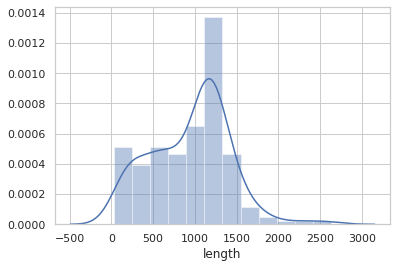

In [123]:
#plot of lengths
dist_plot = merged['length']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

In [124]:
#remove 2 genes from constitutive group so equal sample size to variable
#random sample of 98, using seed 1
merged[merged.gene_type == 'housekeeping'] = merged[merged.gene_type == 'housekeeping'].sample(98, random_state=1)

In [125]:
#drop rows with at least 2 NaNs
merged = merged.dropna(thresh=2)

In [126]:
merged

,chr,start,stop,promoter_AGI,score,strand,source,feature_name,dot2,attributes,gene_type,length
0,1.0,282891.0,282918.0,AT1G01780,.,+,Araport11,gene,.,"Dbxref=PMID:15642518,PMID:15659355,PMID:155317...",highVar,27.0
1,1.0,315831.0,315982.0,AT1G01910,.,-,Araport11,gene,.,"Dbxref=PMID:18315867,PMID:18775970,PMID:207364...",housekeeping,151.0
2,1.0,344515.0,346051.0,AT1G02000,.,+,Araport11,gene,.,"Dbxref=PMID:15247385,PMID:15911562,PMID:187759...",highVar,1536.0
3,1.0,728829.0,730147.0,AT1G03070,.,+,Araport11,gene,.,"Alias=AtLFG4,LFG4,LIFEGUARD 4;Dbxref=PMID:1708...",highVar,1318.0
4,1.0,864019.0,865372.0,AT1G03457,.,-,Araport11,gene,.,"Alias=AtBRN2,BRN2,Bruno-like 2;Dbxref=PMID:149...",highVar,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,5.0,22956628.0,22957985.0,AT5G56750,.,+,Araport11,gene,.,"Dbxref=PMID:15574398,PMID:18775970,PMID:199487...",highVar,1357.0
194,5.0,24326665.0,24327827.0,AT5G60490,.,-,Araport11,gene,.,"Alias=AtFLA12;Dbxref=PMID:12068095,PMID:121774...",highVar,1162.0
195,5.0,24670749.0,24671050.0,AT5G61360,.,+,Araport11,gene,.,"Dbxref=PMID:18775970,locus:2163173;ID=AT5G6136...",highVar,301.0
196,5.0,25909881.0,25910835.0,AT5G64813,.,+,Araport11,gene,.,"Dbxref=PMID:17683937,PMID:23144185,locus:50500...",housekeeping,954.0


In [128]:
#write to bed file so can run OpenChromatin_coverage.py
new_promoter_file = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive.bed'
cols = ['chr', 'start', 'stop', 'promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']
#remove trailing decimal .0 from start and stop
merged = merged.astype({'start': 'int'})
merged = merged.astype({'stop': 'int'})
merged = merged.astype({'chr': 'int'})

merged_coverage = merged[cols]

with open(new_promoter_file,'w') as f:
    merged_coverage.to_csv(f,index=False,sep='\t',header=None)

In [129]:
#write to bed file so can run gat
new_promoter_file_gat = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_gat.bed'
cols_gat = ['chr', 'start', 'stop', 'gene_type','promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']
merged_gat = merged[cols_gat]
with open(new_promoter_file_gat,'w') as f:
    merged_gat.to_csv(f,index=False,sep='\t',header=None)


In [88]:
#Read in new files
RootChomatin_bp_covered = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutiveRootOpenChrom.bp_covered.txt'
ShootChomatin_bp_covered = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutiveShootOpenChrom.bp_covered.txt'
RootShootIntersect_bp_covered = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutiveShootRootIntersectOpenChrom.bp_covered.txt'

In [89]:
root_coverage = percent_coverage(RootChomatin_bp_covered)
shoot_coverage = percent_coverage(ShootChomatin_bp_covered)
rootshootintersect_coverage = percent_coverage(RootShootIntersect_bp_covered)

In [130]:
#add Chr to linestart of promoter bed file

add_chr_linestart('../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_gat.bed','../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_gat_renamed.bed')

In [131]:
#create separate variable and constitutive and gat workspace
promoter_file_renamed = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_gat_renamed.bed'
promoters = pd.read_table(promoter_file_renamed, sep='\t', header=None)
#make a new gat workspace file with all promoters (first 3 columns)
bed = BedTool.from_dataframe(promoters[[0,1,2]]).saveas('../../data/promoter_analysis/chromatin/non-overlapping_includingbidirectional_variable_constitutive_workspace.bed')
#select only variable promoters
variable_promoters = promoters[promoters[3] == 'highVar']
sorted_variable = variable_promoters.sort_values([0,1])
bed = BedTool.from_dataframe(sorted_variable).saveas('../../data/promoter_analysis/chromatin/non-overlapping_includingbidirectional_variable_promoters.bed')
#make a constitutive only file
constitutive_promoters = promoters[promoters[3] == 'housekeeping']
sorted_constitutive = constitutive_promoters.sort_values([0,1])
bed = BedTool.from_dataframe(sorted_constitutive).saveas('../../data/promoter_analysis/chromatin/non-overlapping_includingbidirectional_constitutive_promoters.bed')

In [147]:
#show distribution of the distance from the closest end of the open chromatin peak to the ATG (if overlapping already then distance is 0)
root_peaks_bed = '../../data/ATAC-seq/potter2018/Roots_NaOH_peaks_all_renamed.bed'
shoot_peaks_bed = '../../data/ATAC-seq/potter2018/Shoots_NaOH_peaks_all_renamed.bed'
rootshootintersect_peaks_bed = '../../data/ATAC-seq/potter2018/intersectRootsShoots_PeaksInBoth_renamed.bed'
promoters_bed = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_renamed.bed'
promoter_openchrom_intersect = '../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_chromintersect.bed'

In [148]:
add_chr_linestart('../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive.bed','../../data/promoter_analysis/non-overlapping_includingbidirectional_variable_constitutive_renamed.bed')

In [169]:
def distr_distance_ATG(peaks_bed, promoter_bed, output_file):
    """function to show the distribution of the distance rom the closest end
    of the open chromatin peak to the ATG (if overlapping already then distance is 0)"""
#     peaks = pd.read_table(peaks_bed, sep='\t', header=None)
#     cols = ['chr','start', 'stop']
#     peaks.columns = cols
#     promoters = pd.read_table(promoter_bed, sep='\t', header=None)
#     cols_proms = ['chr', 'start', 'stop', 'gene_type','promoter_AGI', 'score', 'strand', 'source', 'feature_name', 'dot2', 'attributes']
#     promoters.columns = cols_proms
    proms = BedTool(promoter_bed) #read in files using BedTools
    peaks = BedTool(peaks_bed)
    #report chromosome position of overlapping feature, along with the promoter which overlaps it (only reports the overlapping nucleotides, not the whole promoter length. Can use u=True to get whole promoter length)
    #f, the minimum overlap as fraction of A. F, nucleotide fraction of B (genes) that need to be overlapping with A (promoters)
    #wa, Write the original entry in A for each overlap.
    #wo,  Write the original A and B entries plus the number of base pairs of overlap between the two features. Only A features with overlap are reported. 
    #u, write original A entry only once even if more than one overlap
    intersect = proms.intersect(peaks, wo=True) #could add u=True which indicates we want to see the promoters that overlap features in the genome
    #Write to output_file
    with open(output_file, 'w') as output:
        #Each line in the file contains bed entry a and bed entry b that it overlaps plus the number of bp in the overlap so 19 columns
        output.write(str(intersect))
    #read in intersect bed file
    overlapping_proms = pd.read_table(output_file, sep='\t', header=None)
    cols = ['chrA', 'startA', 'stopA', 'promoter_AGI','dot1','strand','source','type','dot2','attributes','chrB', 'startB','stopB','bp_overlap']
    overlapping_proms.columns = cols
    #add empty openchrom_distance_from_ATG column
    overlapping_proms['openchrom_distance_from_ATG'] = int()
    for i, v in overlapping_proms.iterrows():
        #if positive strand feature A
        if overlapping_proms.loc[i,'strand'] == '+':
            #if end of open chromatin is downstream or equal to ATG, distance is 0
            if overlapping_proms.loc[i,'stopA'] <=  overlapping_proms.loc[i, 'stopB']:
                overlapping_proms.loc[i,'openchrom_distance_from_ATG'] = 0
            #else if upstream and chromatin stop is after promoter start, add distance from chromatin stop to ATG
            elif overlapping_proms.loc[i,'startA'] <=  overlapping_proms.loc[i, 'stopB']:
                overlapping_proms.loc[i,'openchrom_distance_from_ATG'] = overlapping_proms.loc[i,'stopA'] - overlapping_proms.loc[i, 'stopB']                 
                
        elif overlapping_proms.loc[i,'strand'] == '-':            
            #if end of open chromatin is downstream or equal to ATG, distance is 0
            if overlapping_proms.loc[i,'startA'] >=  overlapping_proms.loc[i, 'startB']:
                overlapping_proms.loc[i,'openchrom_distance_from_ATG'] = 0
            #else if upstream and chromatin stop is after promoter start, add distance from chromatin stop to ATG  
            elif overlapping_proms.loc[i,'stopA'] >=  overlapping_proms.loc[i, 'startB']:
                overlapping_proms.loc[i,'openchrom_distance_from_ATG'] =  overlapping_proms.loc[i, 'startB'] - overlapping_proms.loc[i,'startB']
    

    
    return overlapping_proms

In [140]:
#show length of open chromatin peaks
rootshootintersect = distr_distance_ATG(rootshootintersect_peaks_bed)
rootshootintersect['length'] = (rootshootintersect.start - rootshootintersect.stop).abs()
rootshootintersect.sort_values('length',ascending=True)


,chr,start,stop,length
11011,chr2,13120034,13120035,1
17114,chr3,17338732,17338733,1
4042,chr1,17009478,17009479,1
9678,chr2,8942149,8942150,1
23561,chr4,17477012,17477013,1
...,...,...,...,...
1297,chr1,4529862,4544652,14790
2649,chr1,8974248,8991865,17617
8811,chr2,3238995,3258591,19596
8812,chr2,3259550,3368978,109428


In [170]:
rootshootintersect = distr_distance_ATG(rootshootintersect_peaks_bed,promoters_bed,promoter_openchrom_intersect)

In [171]:
rootshootintersect
rootshootintersect.sort_values('openchrom_distance_from_ATG',ascending=True)

,chrA,startA,stopA,promoter_AGI,dot1,strand,source,type,dot2,attributes,chrB,startB,stopB,bp_overlap,openchrom_distance_from_ATG
95,chr3,8268588,8269961,AT3G23170,.,-,Araport11,gene,.,"Dbxref=PMID:16081496,PMID:16258011,PMID:162991...",chr3,8267537,8269358,770,0
172,chr5,18597221,18598907,AT5G45840,.,-,Araport11,gene,.,"Dbxref=PMID:12972053,PMID:14756312,PMID:187759...",chr5,18597821,18598799,978,0
97,chr3,9064366,9064524,AT3G24820,.,-,Araport11,gene,.,Dbxref=locus:2087258;ID=AT3G24820;Name=AT3G248...,chr3,9064084,9065130,158,0
96,chr3,8268588,8269961,AT3G23170,.,-,Araport11,gene,.,"Dbxref=PMID:16081496,PMID:16258011,PMID:162991...",chr3,8269398,8270611,563,0
173,chr5,18664629,18665254,AT5G46020,.,-,Araport11,gene,.,"Dbxref=PMID:18775970,locus:2161403;ID=AT5G4602...",chr5,18664667,18665181,514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,chr4,7969176,7970298,AT4G13730,.,+,Araport11,gene,.,"Dbxref=PMID:14576160,locus:2119435;ID=AT4G1373...",chr4,7968604,7969216,40,1082
3,chr1,728829,730147,AT1G03070,.,+,Araport11,gene,.,"Alias=AtLFG4,LFG4,LIFEGUARD 4;Dbxref=PMID:1708...",chr1,728646,729029,200,1118
51,chr2,11779912,11781225,AT2G27600,.,+,Araport11,gene,.,"Alias=ATSKD1,VPS4,VACUOLAR PROTEIN SORTING 4;D...",chr2,11779732,11780038,126,1187
124,chr4,10258957,10260480,AT4G18640,.,+,Araport11,gene,.,"Dbxref=PMID:11820813,PMID:12972053,PMID:154895...",chr4,10258894,10259146,189,1334


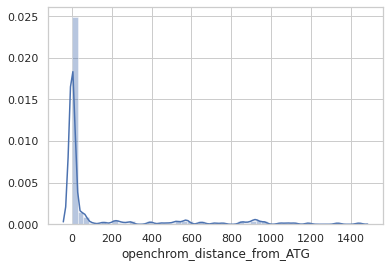

In [172]:
#plot of distances of chomatin to ATG
dist_plot = rootshootintersect['openchrom_distance_from_ATG']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

In [174]:
#now split constitutive and variable
merged_distances = pd.merge(merged, rootshootintersect, on='promoter_AGI')

In [183]:
merged_distances.gene_type

0           highVar
1           highVar
2           highVar
3           highVar
4           highVar
           ...     
186         highVar
187         highVar
188    housekeeping
189         highVar
190         highVar
Name: gene_type, Length: 191, dtype: object

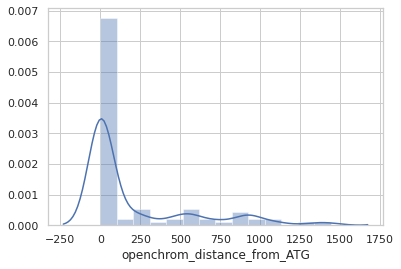

In [181]:
#VARIABLE
#plot of distances of chomatin to ATG 
dist_plot = merged_distances[merged_distances.gene_type=='highVar']['openchrom_distance_from_ATG']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

In [185]:
merged_distances[merged_distances.gene_type=='housekeeping']['openchrom_distance_from_ATG']

7       52
9        0
10       0
12       0
17       0
      ... 
177      0
178      0
182    581
183      0
188    387
Name: openchrom_distance_from_ATG, Length: 99, dtype: int64

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


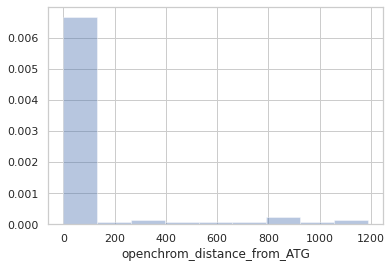

In [184]:
#CONSTITUTIVE
#plot of distances of chomatin to ATG 
dist_plot = merged_distances[merged_distances.gene_type=='housekeeping']['openchrom_distance_from_ATG']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()